# Dependencies

In [1]:
# Core Libraries for Data Manipulation and Numerical Computations
import sys
import os
import pandas as pd  # DataFrame manipulation
import numpy as np   # Linear algebra and numerical operations

# Data Visualization Libraries
import matplotlib.pyplot as plt  # Plotting library
import matplotlib.cm as cm       # Colormap support for custom plots
import seaborn as sns            # Statistical data visualization
# import plotly.express as px      # Interactive visualizations
# import plotly.graph_objects as go  # Advanced Plotly customizations

# Scikit-learn: Machine Learning and Preprocessing
from sklearn.cluster import KMeans  # K-means clustering
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import (
    silhouette_score, 
    silhouette_samples,
    accuracy_score, 
    classification_report,
    calinski_harabasz_score, 
    davies_bouldin_score
)

# Proper version code
import os
import re
import pandas as pd
from datetime import datetime
from fsutils import run_sf_sql as rp
import pandas as pd

# Explainability
# import shap
import os
from datetime import datetime

# Logging
import logging
logging.basicConfig(level=logging.INFO)

# Pandas Display Settings for Full Data Views
pd.set_option('display.max_rows', 100)       # Show all rows
pd.set_option('display.max_columns', 1000)    # Show all columns
pd.set_option('display.max_colwidth', None)   # Prevent column width truncation

In [2]:
pip install XlsxWriter

Looking in indexes: https://nexus-az.cvshealth.com:9443/repository/pypi-proxy/simple/, https://nexus-az.cvshealth.com:9443/repository/Fsutils/simple, https://nexus-az.cvshealth.com:9443/repository/Niagara/simple
  Using cached https://nexus-az.cvshealth.com:9443/repository/pypi-proxy/packages/xlsxwriter/3.2.2/XlsxWriter-3.2.2-py3-none-any.whl (165 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

Looking in indexes: https://nexus-az.cvshealth.com:9443/repository/pypi-proxy/simple/, https://nexus-az.cvshealth.com:9443/repository/Fsutils/simple, https://nexus-az.cvshealth.com:9443/repository/Niagara/simple
  Using cached https://nexus-az.cvshealth.com:9443/repository/pypi-proxy/packages/plotly/6.0.1/plotly-6.0.1-py3-none-any.whl (14.8 MB)
  Using cached https://nexus-az.cvshealth.com:9443/repository/pypi-proxy/packages/narwhals/1.34.1/narwhals-1.34.1-py3-none-any.whl (325 kB)
Note: you may need to restart the kernel to use updated packages.


# Classics Output

In [4]:
# Proper version code
import os
import re
import pandas as pd
from datetime import datetime
from fsutils import run_sf_sql as rp
import pandas as pd

# ----------------------------------------------------------------
# 1. Read data at the beginning
# ----------------------------------------------------------------
# DO NOT USE MERGED ALL!
input_directory = "/home/jovyan/fsassortment/store_clustering/merged_content/Merged_Clustering_Output_Run_20250414_1638"

# SALES
df_need_states = pd.read_parquet(
    "/home/jovyan/fsassortment/store_clustering/data/need_states_sales_20250414_AM.parquet",
)
# df_need_states = pd.read_csv("/home/jovyan/fsassortment/store_clustering/data/need_states_sales_20250324.csv",)
df_need_states_mapping = pd.read_csv(
    "/home/jovyan/fsassortment/store_clustering/data/need_states_mapping_20250414_AM.csv"
)

In [5]:
df_need_states_mapping = df_need_states_mapping[
    [
        'PRODUCT_ID', 'NEED_STATE', 'ATTRIBUTE_1',
        'ATTRIBUTE_2', 'ATTRIBUTE_3', 'ATTRIBUTE_4', 
        'ATTRIBUTE_5','ATTRIBUTE_6',
        'CDT'
    ]
]
df_need_states_mapping.columns = [
    'PRODUCT_ID','NEED_STATE', 'ATTRIBUTE_1', 'ATTRIBUTE_2',
    'ATTRIBUTE_3', 'ATTRIBUTE_4', 
    'ATTRIBUTE_5','ATTRIBUTE_6',
    'CDT'
]

In [6]:
df_need_states.CAT_DSC.unique()

array(['CANDY'], dtype=object)

In [7]:
import warnings
warnings.filterwarnings("ignore")

# Get the Snowflake connection and cursor
conn, _ = rp.get_connection("notebook-xlarge")
query = """
select sku_nbr, category_dsc
from CORE_FSSC.CURATED_PRODUCT.SKU
"""

df_sku_cat = pd.read_sql(query, conn)

Inside config.py slfsvc-twa07
printing snowflake connection dic {'SF_USER_NAME': 'sa_slfsvc_fsca_app_twa_07', 'SF_ACCOUNT': 'cvsfrontstore.east-us-2.privatelink', 'SF_WAREHOUSE': 'WH_FSCA_TWA07_XL_BATCH', 'SF_USER_ROLE': 'ROLE_FSCA_TWA07_BATCH_FR', 'SF_DB': 'CORE_FS', 'SF_AUDIT_SCHEMA': 'WORK_FS'}
printing sfparms {'SF_USER_NAME': 'sa_slfsvc_fsca_app_twa_07', 'SF_ACCOUNT': 'cvsfrontstore.east-us-2.privatelink', 'SF_WAREHOUSE': 'WH_FSCA_TWA07_XL_BATCH', 'SF_USER_ROLE': 'ROLE_FSCA_TWA07_BATCH_FR', 'SF_DB': 'CORE_FS', 'SF_AUDIT_SCHEMA': 'WORK_FS'}
2025-04-14 16:42:29,272 - fsutils.run_sf_sql - INFO - Establishing Snowflake Connection


INFO:fsutils.run_sf_sql:Establishing Snowflake Connection
INFO:azure.identity._credentials.environment:Environment is configured for ClientSecretCredential
INFO:azure.identity._credentials.managed_identity:ManagedIdentityCredential will use IMDS
INFO:azure.core.pipeline.policies.http_logging_policy:Request URL: 'https://kv-rtlfspekv0701slfsvc07.vault.azure.net/secrets/sfkey/?api-version=REDACTED'
Request method: 'GET'
Request headers:
    'Accept': 'application/json'
    'x-ms-client-request-id': '7463f730-194f-11f0-983c-0eb026b0303b'
    'User-Agent': 'azsdk-python-keyvault-secrets/4.9.0 Python/3.9.10 (Linux-5.15.0-1081-azure-x86_64-with-glibc2.31)'
No body was attached to the request


Inside config.py slfsvc-twa07
printing snowflake connection dic {'tenant': 'fabb61b8-3afe-4e75-b934-a47f782b8cd7', 'client_id': '5617df5a-e4aa-4898-8260-9ac51b67e1c0', 'akssecret': 'prod-fspe-sp-secret', 'vault': 'kv-rtlfspekv0701slfsvc07', 'sfsecretkey': 'sfkey', 'sfkeypass': 'sfpasskey'}
Getting snowflake key file from Azure Key Vault


INFO:azure.core.pipeline.policies.http_logging_policy:Response status: 401
Response headers:
    'Cache-Control': 'no-cache'
    'Pragma': 'no-cache'
    'Content-Type': 'application/json; charset=utf-8'
    'Expires': '-1'
    'x-ms-keyvault-region': 'eastus2'
    'x-ms-client-request-id': '7463f730-194f-11f0-983c-0eb026b0303b'
    'x-ms-request-id': '8c3cb4f4-c432-4689-bdba-c5b4e45cbbbb'
    'x-ms-keyvault-service-version': '1.9.2256.1'
    'x-ms-keyvault-network-info': 'conn_type=PrivateLink;private_endpoint=/subscriptions/9406c5fb-8168-43ae-8b61-57701174598f/resourceGroups/rg-rtl-fspekv-prod-use2-secr/providers/Microsoft.Network/privateEndpoints/pep-rtl-fspekv-prod-use2-kv-slfsvc07;addr=10.83.0.175;act_addr_fam=InterNetworkV6;'
    'X-Content-Type-Options': 'REDACTED'
    'Strict-Transport-Security': 'REDACTED'
    'WWW-Authenticate': 'Bearer authorization="https://login.microsoftonline.com/fabb61b8-3afe-4e75-b934-a47f782b8cd7", resource="https://vault.azure.net"'
    'Date': 'Mon,

Getting snowflake key pass from Azure Key Vault


INFO:azure.core.pipeline.policies.http_logging_policy:Response status: 200
Response headers:
    'Cache-Control': 'max-age=86400, private'
    'Content-Type': 'application/json; charset=utf-8'
    'Strict-Transport-Security': 'REDACTED'
    'X-Content-Type-Options': 'REDACTED'
    'Access-Control-Allow-Origin': 'REDACTED'
    'Access-Control-Allow-Methods': 'REDACTED'
    'P3P': 'REDACTED'
    'x-ms-request-id': '7656aea8-c9c5-435b-a71a-ca798f556c00'
    'x-ms-ests-server': 'REDACTED'
    'x-ms-srs': 'REDACTED'
    'Content-Security-Policy-Report-Only': 'REDACTED'
    'X-XSS-Protection': 'REDACTED'
    'Set-Cookie': 'REDACTED'
    'Date': 'Mon, 14 Apr 2025 16:42:29 GMT'
    'Content-Length': '1753'
INFO:azure.core.pipeline.policies.http_logging_policy:Request URL: 'https://login.microsoftonline.com/fabb61b8-3afe-4e75-b934-a47f782b8cd7/oauth2/v2.0/token'
Request method: 'POST'
Request headers:
    'Accept': 'application/json'
    'x-client-sku': 'REDACTED'
    'x-client-ver': 'REDACTED'

2025-04-14 16:42:53,029 - fsutils.run_sf_sql - INFO -  Getting Snowflake Cursor


INFO:fsutils.run_sf_sql: Getting Snowflake Cursor


2025-04-14 16:42:53,030 - fsutils.run_sf_sql - INFO - Got the cursor


INFO:fsutils.run_sf_sql:Got the cursor
INFO:snowflake.connector.cursor:Number of results in first chunk: 6688
ERROR:snowflake.connector.ocsp_snowflake:Failed to get OCSP response after 1 attempt. Consider checking for OCSP URLs being blocked
ERROR:snowflake.connector.ocsp_snowflake:Failed to get OCSP response after 1 attempt. Consider checking for OCSP URLs being blocked
 {'driver': 'PythonConnector', 'version': '3.12.4', 'eventType': 'RevocationCheckFailure', 'eventSubType': 'OCSPResponseFailedToConnectCacheServer|OCSPResponseFetchFailure', 'sfcPeerHost': '2ibhobsfcb1stg.blob.core.windows.net', 'certId': 'MEowBwYFKw4DAhoEFLNP/OrByo2+E/2LhziwI/PYlvOsBBT+CXFAVQUQRNikgXW4nhrpSgaIyAITMwGKQCDwmBWLDQNM4gAAAYpAIA==', 'ocspRequestBase64': 'MFIwUDBOMEwwSjAHBgUrDgMCGgQUs0/86sHKjb4T/YuHOLAj89iW86wEFP4JcUBVBRBE2KSBdbieGulKBojIAhMzAYpAIPCYFYsNA0ziAAABikAg', 'ocspResponderURL': 'http://oneocsp.microsoft.com/ocsp', 'errorMessage': '254014: 254014: Failed to get OCSP response after 1 attempt.', 'inse

In [8]:
df_need_states_mapping = df_need_states_mapping.merge(
    df_sku_cat.rename(columns = {"SKU_NBR":"PRODUCT_ID", "CATEGORY_DSC":"category"}),
    on = ["PRODUCT_ID"],
    how = "left"
)

In [9]:
# Rename product_id to SKU_NBR in df_need_states_mapping
df_need_states_mapping = df_need_states_mapping.rename(columns={'PRODUCT_ID': 'SKU_NBR'})

# ----------------------------------------------------------------
# 2. Merge df_need_states and df_need_states_mapping
# ----------------------------------------------------------------
rows_before = df_need_states.shape[0]
df_need_states = df_need_states.merge(
    df_need_states_mapping[
        [
            'SKU_NBR', 'NEED_STATE', 'ATTRIBUTE_1', 'ATTRIBUTE_2',
            'ATTRIBUTE_3', 'ATTRIBUTE_4', 'ATTRIBUTE_5','ATTRIBUTE_6','CDT', 
            'category'
        ]
    ],
    on=['SKU_NBR', 'NEED_STATE'],
    how='left'
)

In [10]:

# ----------------------------------------------------------------
# 3. Create a grouped dataset (df_grouped) with dropna=False
# ----------------------------------------------------------------
df_grouped = df_need_states.groupby(
    [
        'STORE_NBR', 'NEED_STATE',
        'ATTRIBUTE_1', 'ATTRIBUTE_2', 'ATTRIBUTE_3', 'ATTRIBUTE_4','ATTRIBUTE_5','ATTRIBUTE_6',
        'CDT', 'CAT_DSC'
    ],
    dropna=False,
    as_index=False
)['TOTAL_SALES'].sum()

# ----------------------------------------------------------------
# 4. Prepare output directory with timestamp
# ----------------------------------------------------------------
current_datetime_str = datetime.now().strftime("%d%m%Y_%H%M")
base_output_directory = "/home/jovyan/fsassortment/store_clustering/classics_content/"
output_directory = os.path.join(base_output_directory, f"Classics_Output_Run_{current_datetime_str}")
os.makedirs(output_directory, exist_ok=True)

# ----------------------------------------------------------------
# 5. Process all .csv files from a user-defined directory
# ----------------------------------------------------------------
id_cols = [
    "store_nbr",
    "external_cluster_labels",
    "internal_cluster_labels",
    "demand_cluster_labels",
    "rebalanced_demand_cluster_labels",
    "external_granularity",
    "internal_granularity"
]

# Dictionary to fix categories that have slashes, etc.
fix_slashes = {
    "ACNE HSC": "ACNE/HSC",
    "DIET NUTRITION": "DIET/NUTRITION",
    # add more if needed
}

for filename in os.listdir(input_directory):
    if filename.endswith(".csv"):
        full_path = os.path.join(input_directory, filename)

        # --------------------------------------------------------
        # a) Extract category from the filename using a regex
        # --------------------------------------------------------
        file_root, _ = os.path.splitext(filename)
        pattern = r"^merged_clusters_(.*?)_\d{8}_\d{4}"
        match = re.match(pattern, file_root)
        if not match:
            print(f"Could not extract category from filename: {filename}")
            continue

        category_underscored = match.group(1)
        category = category_underscored.replace("_", " ")

        # Apply special fixes for slash-based categories
        if category in fix_slashes:
            category = fix_slashes[category]

        print(f"\nProcessing file: {filename}")
        print(f"Detected category: {category}")

        # --------------------------------------------------------
        # b) Read the clustering output
        # --------------------------------------------------------
        clustering_output_temp = pd.read_csv(full_path)

        # Keep only the ID columns, drop duplicates
        clustering_output = (
            clustering_output_temp[id_cols]
            .drop_duplicates()
            .copy()
        )

        # Rename columns for merging consistency
        clustering_output.columns = [
            "STORE_NBR",
            "external_cluster_labels",
            "internal_cluster_labels",
            "demand_cluster_labels",
            "rebalanced_demand_cluster_labels",
            "external_granularity",
            "internal_granularity"
        ]

        # --------------------------------------------------------
        # c) Filter df_grouped by this category
        # --------------------------------------------------------
        df_grouped_CAT = df_grouped[df_grouped['CAT_DSC'] == category]

        # --------------------------------------------------------
        # d) Merge with clustering_output on STORE_NBR
        # --------------------------------------------------------
        df_final_CAT = clustering_output.merge(
            df_grouped_CAT,
            on="STORE_NBR",
            how="left"
        )

        # --------------------------------------------------------
        # e) Grouping - Internal
        # --------------------------------------------------------
        grouped_internal = (
            df_final_CAT
            .groupby([
                'internal_cluster_labels',
                'NEED_STATE',
                'CAT_DSC',
                'external_granularity',
                'internal_granularity',
                'ATTRIBUTE_1',
                'ATTRIBUTE_2',
                'ATTRIBUTE_3',
                'ATTRIBUTE_4','ATTRIBUTE_5','ATTRIBUTE_6',
                'CDT'
            ],
            dropna=False)
            .agg(TOTAL_SALES_SUM=('TOTAL_SALES', 'sum'))
            .reset_index()
        )

        # --------------------------------------------------------
        # f) Grouping - Rebalanced
        # --------------------------------------------------------
        grouped_rebalanced = (
            df_final_CAT
            .groupby([
                'rebalanced_demand_cluster_labels',
                'NEED_STATE',
                'CAT_DSC',
                'external_granularity',
                'internal_granularity',
                'ATTRIBUTE_1',
                'ATTRIBUTE_2',
                'ATTRIBUTE_3',
                'ATTRIBUTE_4','ATTRIBUTE_5','ATTRIBUTE_6',
                'CDT'
            ],
            dropna=False)
            .agg(TOTAL_SALES_SUM=('TOTAL_SALES', 'sum'))
            .reset_index()
        )

        # --------------------------------------------------------
        # (NEW) 5.1: Helper function to build "attribute-specific" sheets
        # --------------------------------------------------------
        def build_attr_groupings(df_in, cluster_col, attribute_col):
            """
            df_in        : The aggregated dataframe (e.g. grouped_internal or grouped_rebalanced),
                           which has TOTAL_SALES_SUM already.
            cluster_col  : 'internal_cluster_labels' or 'rebalanced_demand_cluster_labels'
            attribute_col: 'ATTRIBUTE_1', 'ATTRIBUTE_2', etc.

            Returns a new dataframe with:
              groupby([cluster_col, 'CAT_DSC', attribute_col, 'CDT'], dropna=False).sum()
              plus extra columns:
                1) total CDT total_sales
                2) total cluster_col total_sales
                3) total total_sales across entire df
            """
            # Summarize by [cluster_col, CAT_DSC, attribute_col, CDT]
            df_attr = (
                df_in
                .groupby([cluster_col, 'CAT_DSC', attribute_col, 'CDT'], dropna=False)
                .agg({'TOTAL_SALES_SUM': 'sum'})
                .reset_index()
            )

            # total CDT total_sales
            df_attr['CDT_TOTAL_SALES'] = (
                df_attr.groupby(['CAT_DSC', 'CDT'])['TOTAL_SALES_SUM'].transform('sum')
            )

            # total cluster_col total_sales
            df_attr[f'{cluster_col}_TOTAL_SALES'] = (
                df_attr.groupby([cluster_col])['TOTAL_SALES_SUM'].transform('sum')
            )

            # total total_sales
            total_sum = df_attr['TOTAL_SALES_SUM'].sum()
            df_attr['TOTAL_TOTAL_SALES'] = total_sum

            return df_attr

        # --------------------------------------------------------
        # (NEW) 5.2: Build all the extra sheets for grouped_internal
        # --------------------------------------------------------
        attributes = ['ATTRIBUTE_1', 'ATTRIBUTE_2', 'ATTRIBUTE_3', 'ATTRIBUTE_4','ATTRIBUTE_5','ATTRIBUTE_6',]
        internal_attr_sheets = {}
        for attr in attributes:
            sheet_df = build_attr_groupings(
                df_in=grouped_internal,
                cluster_col='internal_cluster_labels',
                attribute_col=attr
            )
            internal_attr_sheets[f'Grouped Internal {attr}'] = sheet_df

        # --------------------------------------------------------
        # (NEW) 5.3: Build all the extra sheets for grouped_rebalanced
        # --------------------------------------------------------
        rebalanced_attr_sheets = {}
        for attr in attributes:
            sheet_df = build_attr_groupings(
                df_in=grouped_rebalanced,
                cluster_col='rebalanced_demand_cluster_labels',
                attribute_col=attr
            )
            rebalanced_attr_sheets[f'Grouped Rebalanced {attr}'] = sheet_df

        # --------------------------------------------------------
        # g) Write to Excel in the new output directory
        # --------------------------------------------------------
        # Replace any slashes in 'category' so it's safe as a file name
        safe_category_for_filename = category.replace("/", "_")
        excel_filename = f"classics_output_{safe_category_for_filename}_{current_datetime_str}.xlsx"
        excel_full_path = os.path.join(output_directory, excel_filename)

        with pd.ExcelWriter(excel_full_path, engine='xlsxwriter') as writer:
            # Original two sheets:
            grouped_internal.to_excel(writer, index=False, sheet_name='Grouped Internal')
            grouped_rebalanced.to_excel(writer, index=False, sheet_name='Grouped Rebalanced')

            # Write the new attribute-specific sheets (internal)
            for sheet_name, df_sheet in internal_attr_sheets.items():
                df_sheet.to_excel(writer, index=False, sheet_name=sheet_name)

            # Write the new attribute-specific sheets (rebalanced)
            for sheet_name, df_sheet in rebalanced_attr_sheets.items():
                df_sheet.to_excel(writer, index=False, sheet_name=sheet_name)

        print(f"Excel file created: {excel_full_path}")

        # --------------------------------------------------------
        # h) Print sum checks (rounded to the nearest whole number)
        # --------------------------------------------------------
        # 1) Sum of grouped_internal['TOTAL_SALES_SUM']
        print(
            "Sum of grouped_internal['TOTAL_SALES_SUM'] (rounded):",
            round(grouped_internal["TOTAL_SALES_SUM"].sum())
        )

        # 2) Sum of df_final_CAT['TOTAL_SALES']
        if "TOTAL_SALES" in df_final_CAT.columns:
            print(
                "Sum of df_final_CAT['TOTAL_SALES'] (rounded):",
                round(df_final_CAT["TOTAL_SALES"].sum())
            )
        else:
            print("df_final_CAT has no 'TOTAL_SALES' column.")

        # 3) Sum of df_grouped_CAT['TOTAL_SALES'] for the clustering stores
        clustering_stores = clustering_output["STORE_NBR"].unique().tolist()
        df_grouped_CAT_for_clustering = df_grouped_CAT[
            df_grouped_CAT["STORE_NBR"].isin(clustering_stores)
        ]
        print(
            "Sum of df_grouped_CAT['TOTAL_SALES'] for clustering stores (rounded):",
            round(df_grouped_CAT_for_clustering["TOTAL_SALES"].sum())
        )

        # 4) Sum of df_need_states for this category & clustering stores
        category_clustering_sum = df_need_states[
            (df_need_states["CAT_DSC"] == category) &
            (df_need_states["STORE_NBR"].isin(clustering_stores))
        ]["TOTAL_SALES"].sum()
        print(
            f"Sum of df_need_states for {category} & clustering stores (rounded):",
            round(category_clustering_sum)
        )

print("\nAll files processed.")



Processing file: merged_clusters_CANDY_20250414_1638_CANDY_20250414_1638_20250414_1639.csv
Detected category: CANDY
Excel file created: /home/jovyan/fsassortment/store_clustering/classics_content/Classics_Output_Run_14042025_1643/classics_output_CANDY_14042025_1643.xlsx
Sum of grouped_internal['TOTAL_SALES_SUM'] (rounded): 756867365
Sum of df_final_CAT['TOTAL_SALES'] (rounded): 756867365
Sum of df_grouped_CAT['TOTAL_SALES'] for clustering stores (rounded): 756867365
Sum of df_need_states for CANDY & clustering stores (rounded): 756867365

All files processed.


# Cluster Map Visalization

In [8]:
pwd

'/home/jovyan/fsassortment/store_clustering/notebooks/analysis'

In [10]:
# df_raw = pd.read_csv("/Users/agrotisnicolas/Clustering_Repo_Final/merged_content/Merged_Clustering_Output_Run_20250225_1351/merged_clusters_ORAL_HYGIENE_20250225_1347_ORAL_HYGIENE_20250225_1349_20250225_1351.csv")

df_raw = pd.read_csv("/home/jovyan/fsassortment/store_clustering/merged_content_all/Merged_Clustering_Output_Run_All_20250317_2120/merged_clusters_ACNE_HSC_20250317_2112_ACNE_HSC_20250317_2118_ALL_20250317_2123.csv")

In [ ]:
# !pip show scipy

In [15]:
import plotly.graph_objects as go

# --------------------------------------------------------------------
# 1. Create a copy of your dataframe (optional) and ensure label columns are strings
# --------------------------------------------------------------------
df = df_raw.copy()
df['external_cluster_labels'] = df['external_cluster_labels'].astype(str)
df['internal_cluster_labels'] = df['internal_cluster_labels'].astype(str)
df['rebalanced_demand_cluster_labels'] = df['rebalanced_demand_cluster_labels'].astype(str)

# --------------------------------------------------------------------
# 2. Get the unique label values from each cluster column
# --------------------------------------------------------------------
unique_ext = df['external_cluster_labels'].unique().tolist()
unique_int = df['internal_cluster_labels'].unique().tolist()
unique_reb = df['rebalanced_demand_cluster_labels'].unique().tolist()

# --------------------------------------------------------------------
# 3. Create an empty Figure and add Scattermapbox traces
# --------------------------------------------------------------------
fig = go.Figure()

# Helper function to avoid repeating code:
def create_scattermapbox_trace(subset, label_text, visible_flag):
    """
    Returns a Scattermapbox object where the only hover text is the store_nbr
    (latitude and longitude are not displayed).
    """
    return go.Scattermapbox(
        lat=subset['LATITUDE'],
        lon=subset['LONGITUDE'],
        mode='markers',
        marker=dict(size=9),
        text=subset['store_nbr'],            # Hover text will be the store number
        hovertemplate="Store: %{text}<extra></extra>", 
        # The <extra></extra> removes the secondary hover box (e.g. trace name)
        
        name=label_text,                     # Legend entry
        visible=visible_flag
    )

# Add external cluster traces (visible by default)
for val in unique_ext:
    subset = df[df['external_cluster_labels'] == val]
    fig.add_trace(
        create_scattermapbox_trace(subset, f"External: {val}", visible_flag=True)
    )

# Add internal cluster traces (start hidden)
for val in unique_int:
    subset = df[df['internal_cluster_labels'] == val]
    fig.add_trace(
        create_scattermapbox_trace(subset, f"Internal: {val}", visible_flag=False)
    )

# Add rebalanced demand cluster traces (start hidden)
for val in unique_reb:
    subset = df[df['rebalanced_demand_cluster_labels'] == val]
    fig.add_trace(
        create_scattermapbox_trace(subset, f"Rebalanced: {val}", visible_flag=False)
    )

# --------------------------------------------------------------------
# 4. Create one dropdown menu with three "steps" (one per label type).
# --------------------------------------------------------------------
n_ext = len(unique_ext)
n_int = len(unique_int)
n_reb = len(unique_reb)

# Step for "External"
visibility_ext = [False] * (n_ext + n_int + n_reb)
for i in range(n_ext):
    visibility_ext[i] = True  # Only external cluster traces

# Step for "Internal"
visibility_int = [False] * (n_ext + n_int + n_reb)
for i in range(n_ext, n_ext + n_int):
    visibility_int[i] = True  # Only internal cluster traces

# Step for "Rebalanced"
visibility_reb = [False] * (n_ext + n_int + n_reb)
for i in range(n_ext + n_int, n_ext + n_int + n_reb):
    visibility_reb[i] = True  # Only rebalanced cluster traces

updatemenus = [
    dict(
        type="dropdown",
        showactive=True,
        x=0.5,
        xanchor="center",
        y=1.07,
        yanchor="top",
        buttons=[
            dict(
                label="Color by External",
                method="update",
                args=[
                    {"visible": visibility_ext},
                    {"title": "Stores Colored by External Cluster"}
                ]
            ),
            dict(
                label="Color by Internal",
                method="update",
                args=[
                    {"visible": visibility_int},
                    {"title": "Stores Colored by Internal Cluster"}
                ]
            ),
            dict(
                label="Color by Rebalanced",
                method="update",
                args=[
                    {"visible": visibility_reb},
                    {"title": "Stores Colored by Rebalanced Demand Cluster"}
                ]
            )
        ]
    )
]

# --------------------------------------------------------------------
# 5. Finalize layout
# --------------------------------------------------------------------
fig.update_layout(
    title="Stores Colored by External Cluster",  # Default title
    mapbox=dict(
        style="open-street-map",
        zoom=3,
        center={"lat": 37.0902, "lon": -95.7129}  # Approx center of the US
    ),
    margin=dict(r=0, l=0, t=50, b=0),
    showlegend=True,
    updatemenus=updatemenus
)

# --------------------------------------------------------------------
# 6. Save to an HTML file
# --------------------------------------------------------------------
output_file = "stores_map_18032025_ACNE.html"
fig.write_html(output_file, auto_open=False)

print(f"HTML map saved to: {output_file}")
print("Open this file in a web browser to view the interactive map.")


HTML map saved to: stores_map_18032025_ACNE.html
Open this file in a web browser to view the interactive map.


/tmp/ipykernel_2366/4149057594.py:29: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [17]:
pwd

'/home/jovyan/fsassortment/store_clustering/notebooks/analysis'

# Cluster comparison

In [18]:
import pandas as pd
import numpy as np
from sklearn.metrics import adjusted_rand_score
from scipy.optimize import linear_sum_assignment

df_before = pd.read_csv("/home/jovyan/fsassortment/store_clustering/merged_content/Merged_Clustering_Output_Run_20250317_2120/merged_clusters_BEVERAGES_20250317_2112_BEVERAGES_20250317_2118_20250317_2122.csv")

df_after = pd.read_csv("/home/jovyan/fsassortment/store_clustering/merged_content/Merged_Clustering_Output_Run_20250317_1734/merged_clusters_BEVERAGES_20250317_1727_BEVERAGES_20250317_1731_20250317_1736.csv")

##############################################################################
# Helper functions
##############################################################################
def calculate_ari(df_merged, old_col, new_col):
    """Compute Adjusted Rand Index (ARI)."""
    old_labels = df_merged[old_col].values
    new_labels = df_merged[new_col].values
    ari = adjusted_rand_score(old_labels, new_labels)
    return ari

def build_confusion_matrix(df_merged, old_col, new_col):
    """Build a confusion matrix for old vs. new clusters."""
    old_clusters = df_merged[old_col].unique()
    new_clusters = df_merged[new_col].unique()
    
    # Sort them to have a consistent order
    old_clusters_sorted = np.sort(old_clusters)
    new_clusters_sorted = np.sort(new_clusters)
    
    confusion = np.zeros((len(old_clusters_sorted), len(new_clusters_sorted)), dtype=int)
    
    for i, oc in enumerate(old_clusters_sorted):
        for j, nc in enumerate(new_clusters_sorted):
            confusion[i, j] = ((df_merged[old_col] == oc) &
                               (df_merged[new_col] == nc)).sum()
    return confusion, old_clusters_sorted, new_clusters_sorted

def hungarian_best_mapping(confusion):
    """
    Given a confusion matrix, use the Hungarian algorithm to find the best
    old->new cluster mapping that maximizes overlap.
    Returns row_ind, col_ind, and the sum of overlaps.
    """
    # linear_sum_assignment minimizes the sum, so pass -confusion to maximize
    row_ind, col_ind = linear_sum_assignment(-confusion)
    max_overlap = confusion[row_ind, col_ind].sum()
    return row_ind, col_ind, max_overlap

##############################################################################
# Example: Merging the old/new dataframes and printing ARI & Overlap
##############################################################################

# df_before = pd.read_csv("old_clusters.csv")  # Example
# df_after  = pd.read_csv("new_clusters.csv")

df_merged = pd.merge(
    df_before,
    df_after,
    on='store_nbr',
    suffixes=('_old', '_new')
)

# Calculate total unique stores
total_unique_stores = df_merged['store_nbr'].nunique()

cluster_cols = [
    'external_cluster_labels',
    'internal_cluster_labels',
    'rebalanced_demand_cluster_labels'
]

for cluster_label in cluster_cols:
    # old/new columns
    old_col = cluster_label + '_old'
    new_col = cluster_label + '_new'
    
    # 1. Adjusted Rand Index
    ari_score = calculate_ari(df_merged, old_col, new_col)
    
    # 2. Best overlap using Hungarian matching
    confusion, old_clusters_sorted, new_clusters_sorted = build_confusion_matrix(df_merged, old_col, new_col)
    row_ind, col_ind, max_overlap = hungarian_best_mapping(confusion)
    
    # Convert overlap to percentage of total unique stores
    overlap_percent = 100.0 * max_overlap / total_unique_stores
    
    print(f"=== {cluster_label.upper()} ===")
    print(f"Adjusted Rand Index (ARI): {ari_score:.3f}")
    print(f"Best total overlap (Hungarian): {max_overlap} of {total_unique_stores} stores ({overlap_percent:.2f}%)")
    print()


=== EXTERNAL_CLUSTER_LABELS ===
Adjusted Rand Index (ARI): 1.000
Best total overlap (Hungarian): 6831 of 6831 stores (100.00%)

=== INTERNAL_CLUSTER_LABELS ===
Adjusted Rand Index (ARI): 1.000
Best total overlap (Hungarian): 6831 of 6831 stores (100.00%)

=== REBALANCED_DEMAND_CLUSTER_LABELS ===
Adjusted Rand Index (ARI): 1.000
Best total overlap (Hungarian): 6831 of 6831 stores (100.00%)



In [19]:
df_all_external = pd.read_csv("/home/jovyan/fsassortment/store_clustering/data/clustering_features_plus_night_traffic_07022025.csv")

In [20]:
import pandas as pd

# 1. Define the exact columns you want to bring over from df_merged
#    plus 'store_nbr' to merge on.
cols_to_transfer = [
    'store_nbr',
    'external_cluster_labels_old',
    'internal_cluster_labels_old',
    'demand_cluster_labels_old',
    'external_cluster_labels_new',
    'internal_cluster_labels_new',
    'demand_cluster_labels_new'
]

# 2. Subset df_merged to keep only these columns
df_cluster_subset = df_merged[cols_to_transfer].copy()

# 3. Merge with df_all_external, matching 'STORE_NBR' in df_all_external to 'store_nbr' in df_cluster_subset
#    The 'how="left"' keeps all rows from df_all_external and brings in cluster labels where matches are found.
df_all_final = pd.merge(
    df_all_external,
    df_cluster_subset,
    left_on='STORE_NBR',
    right_on='store_nbr',
    how='left'
)

# 4. Optionally, drop the redundant 'store_nbr' column if you only need 'STORE_NBR'.
df_all_final.drop(columns=['store_nbr'], inplace=True)

# Now df_all_final includes:
# - all columns from df_all_external
# - the selected cluster columns from df_merged (old/new labels)

# Quick check
# print(df_all_final.dtypes)
df_all_final.head()


,STORE_NBR,DAYTIME_POP_CNT,DAYNITE_RATIO_FCTR_NBR,TRAFFIC_CNT,FS_SALES_PER_SQFT,AVERAGE_INCOME_PER_PERSON,WHITE_PCT_PZ_PG,BLACK_PCT_PZ_PG,ASIAN_PCT_PZ_PG,HISP_PCT_PZ_PG,OTHER_RACE_PCT_PZ_PG,RENTERS_PCT,URBAN_PCT,SUBURBAN_PCT,SEC_CITY_PCT,TOWN_AND_RURAL_PCT,WALM_CNT_MEAN,TRGT_CNT_MEAN,KMART_CNT_MEAN,CHAIN_DRUG_STR_CNT_MEAN,CHAIN_DRUG_STR_NO_RX_CNT_MEAN,MASS_MERCH_CNT_MEAN,MAJOR_MASS_CNT_MEAN,WHOLESALE_MBR_CNT_MEAN,INDEP_CNT_MEAN,GROC_CNT_MEAN,GROC_PHARM_CNT_MEAN,MAJOR_GROC_CNT_MEAN,FAMDOLGEN_CNT_MEAN,HH_W_INCOME_0_TO_15000_PCT_MEAN,HH_W_INCOME_15000_TO_25000_PCT_MEAN,HH_W_INCOME_25000_TO_35000_PCT_MEAN,HH_W_INCOME_35000_TO_50000_PCT_MEAN,HH_W_INCOME_50000_TO_75000_PCT_MEAN,HH_W_INCOME_75000_TO_100000_PCT_MEAN,HH_W_INCOME_100000_TO_150000_PCT_MEAN,HH_W_INCOME_150000_AND_UP_PCT_MEAN,AVERAGE_AGE,AVERAGE_PERSONS_PER_HH,POP_0_TO_4_PCT_MEAN,POP_5_TO_14_PCT_MEAN,POP_15_TO_24_PCT_MEAN,POP_25_TO_34_PCT_MEAN,POP_35_TO_44_PCT_MEAN,POP_45_TO_54_PCT_MEAN,POP_55_TO_64_PCT_MEAN,POP_65_TO_74_PCT_MEAN,POP_75_AND_UP_PCT_MEAN,LATITUDE,LONGITUDE,PHARM_RATIO,EDUC_0_TO_9TH_PCT_MEAN,EDUC_SOME_HS_PCT_MEAN,EDUC_HS_GRAD_PCT_MEAN,EDUC_SOME_COLLEGE_PCT_MEAN,EDUC_ASSOCIATE_DEGREE_PCT_MEAN,EDUC_BACHELOR_DEGREE_PCT_MEAN,EDUC_GRAD_OR_PROF_DEGREE_PCT_MEAN,HOME_VALUE_LESS_THAN_40000_PCT_MEAN,HOME_VALUE_40000_TO_59999_PCT_MEAN,HOME_VALUE_60000_TO_79999_PCT_MEAN,HOME_VALUE_80000_TO_99999_PCT_MEAN,HOME_VALUE_100000_TO_149999_PCT_MEAN,HOME_VALUE_150000_TO_199999_PCT_MEAN,HOME_VALUE_200000_TO_299999_PCT_MEAN,HOME_VALUE_300000_TO_399999_PCT_MEAN,HOME_VALUE_400000_TO_499999_PCT_MEAN,HOME_VALUE_500000_OR_MORE_PCT_MEAN,HOME_VALUE_MEDIAN_AMT_MEAN,external_cluster_labels_old,internal_cluster_labels_old,demand_cluster_labels_old,external_cluster_labels_new,internal_cluster_labels_new,demand_cluster_labels_new
0,5231,414,0.581215,6167,99.393499,23975.138662,0.468438,0.252833,0.018192,0.222703,0.037834,0.284064,0.0,0.094088,0.000057,0.905855,1,0,0,1,0,6,1,0,1,3,1,1,3,0.109748,0.145895,0.105863,0.156909,0.183587,0.135055,0.135269,0.027674,38.515503,2.816462,0.064365,0.116934,0.166406,0.138831,0.119293,0.118408,0.107128,0.086852,0.081175,29.118709,-82.026057,1.0,0.065348,0.067760,0.379040,0.244331,0.086990,0.093944,0.062588,0.014800,0.006371,0.002444,0.011672,0.065681,0.071763,0.235775,0.355867,0.141387,0.094241,3.257102e+05,1.0,2.0,1_2,1.0,2.0,1_2
1,1435,2042,1.085394,25704,225.589808,33989.994536,0.762925,0.108679,0.016260,0.056063,0.056073,0.394201,0.0,0.217095,0.766243,0.016663,0,0,0,0,0,2,0,0,0,2,1,0,2,0.102247,0.082343,0.087680,0.143354,0.168738,0.137281,0.159496,0.118860,40.423927,2.401485,0.062261,0.114280,0.141100,0.117964,0.122827,0.121648,0.129458,0.114648,0.075155,39.661956,-77.700462,1.0,0.025581,0.052176,0.303446,0.235633,0.078826,0.191350,0.112988,0.003461,0.005984,0.000860,0.002555,0.021690,0.064776,0.206117,0.278184,0.185111,0.231261,3.699377e+05,7.0,1.0,7_1,7.0,1.0,7_1
2,9647,4439,2.325646,27946,507.521047,56804.222115,0.588612,0.008090,0.207338,0.138078,0.057882,0.462493,0.0,0.355478,0.644522,0.000000,0,0,0,2,0,1,0,0,4,2,0,0,0,0.057996,0.054761,0.068993,0.096128,0.146704,0.082317,0.176724,0.316378,42.594944,2.522027,0.056933,0.102806,0.127125,0.124998,0.094015,0.122800,0.160307,0.127692,0.082599,34.205687,-118.221047,1.0,0.030501,0.036985,0.143468,0.152095,0.079652,0.286540,0.270760,0.004001,0.000000,0.000000,0.000000,0.000000,0.002878,0.001041,0.000390,0.006126,0.985564,1.510213e+06,2.0,3.0,2_3,2.0,3.0,2_3
3,8945,5788,3.720834,17006,317.656602,37004.002927,0.664413,0.116676,0.025254,0.144704,0.048952,0.504974,0.0,0.091168,0.800165,0.108667,0,0,0,2,0,2,0,0,1,5,1,0,1,0.110274,0.083452,0.084211,0.116979,0.167862,0.149980,0.142719,0.144522,42.447693,2.276253,0.056019,0.103176,0.125670,0.115260,0.129636,0.119226,0.134532,0.123625,0.092332,41.936340,-74.025520,1.0,0.037159,0.081840,0.299284,0.178769,0.097738,0.174712,0.130499,0.034576,0.009950,0.005102,0.003029,0.024117,0.048829,0.175106,0.202810,0.167622,0.328858,3.982643e+05,7.0,0.0,7_0,7.0,0.0,7_0
4,5045,302,0

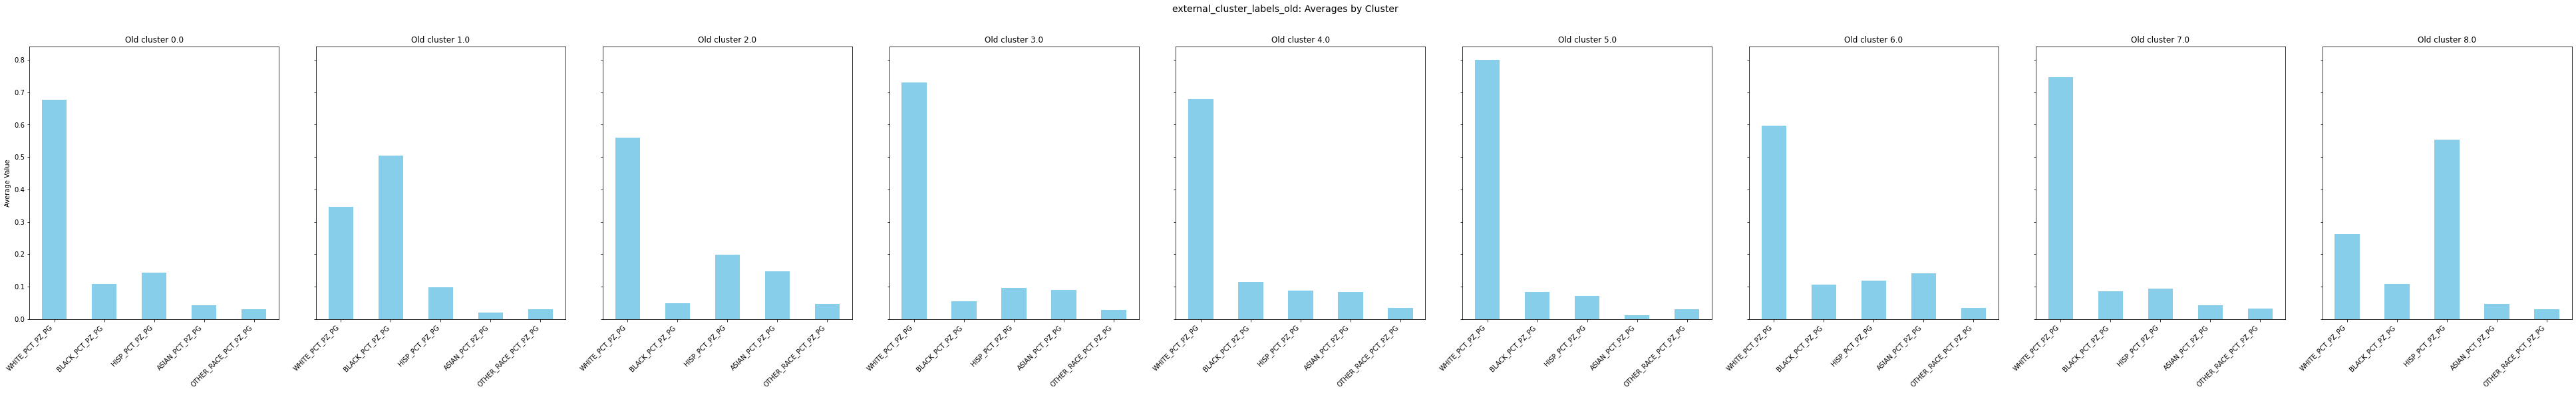

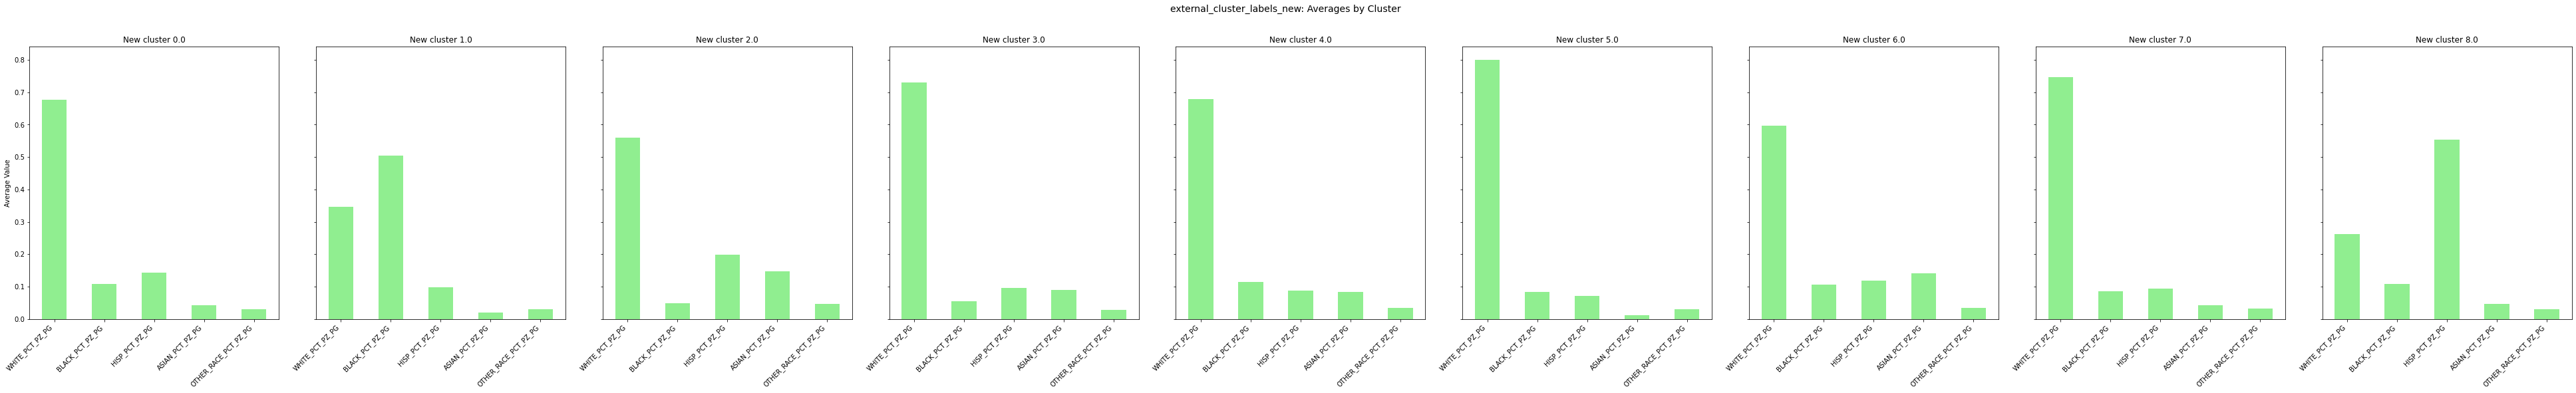

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Suppose df_all_final is your merged DataFrame that includes:
#   - 'external_cluster_labels_old'
#   - 'external_cluster_labels_new'
#   - plus other numeric columns (e.g., demographics) you want to compare.

# Example columns to examine
columns_of_interest = [
    'WHITE_PCT_PZ_PG',
    'BLACK_PCT_PZ_PG',
    'HISP_PCT_PZ_PG',
    'ASIAN_PCT_PZ_PG',
    'OTHER_RACE_PCT_PZ_PG'
]

# 1) EXTERNAL (OLD) LABELS
old_col = 'external_cluster_labels_old'
old_cluster_ids = df_all_final[old_col].dropna().unique()
old_cluster_ids = sorted(old_cluster_ids)

# Create a figure with one row and as many columns as there are unique old clusters
fig, axes = plt.subplots(
    nrows=1, 
    ncols=len(old_cluster_ids), 
    figsize=(6 * len(old_cluster_ids), 8),
    sharey=True  # optional, to share the same y-axis range
)

# If there's only 1 cluster, axes might not be a list. So we ensure it's always iterable.
if len(old_cluster_ids) == 1:
    axes = [axes]

for i, cid in enumerate(old_cluster_ids):
    # Subset for cluster cid
    subset = df_all_final[df_all_final[old_col] == cid]
    if subset.empty:
        continue
    
    # Calculate mean for the specified columns
    mean_vals = subset[columns_of_interest].mean()
    
    # Plot on the i-th subplot
    ax = axes[i]
    mean_vals.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f"Old cluster {cid}")
    ax.set_xticklabels(mean_vals.index, rotation=45, ha='right')
    ax.set_ylabel("Average Value")

plt.suptitle("external_cluster_labels_old: Averages by Cluster", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

# 2) EXTERNAL (NEW) LABELS
new_col = 'external_cluster_labels_new'
new_cluster_ids = df_all_final[new_col].dropna().unique()
new_cluster_ids = sorted(new_cluster_ids)

fig, axes = plt.subplots(
    nrows=1, 
    ncols=len(new_cluster_ids), 
    figsize=(6 * len(new_cluster_ids), 8),
    sharey=True
)

if len(new_cluster_ids) == 1:
    axes = [axes]

for i, cid in enumerate(new_cluster_ids):
    subset = df_all_final[df_all_final[new_col] == cid]
    if subset.empty:
        continue
    
    mean_vals = subset[columns_of_interest].mean()
    
    ax = axes[i]
    mean_vals.plot(kind='bar', ax=ax, color='lightgreen')
    ax.set_title(f"New cluster {cid}")
    ax.set_xticklabels(mean_vals.index, rotation=45, ha='right')
    ax.set_ylabel("Average Value")

plt.suptitle("external_cluster_labels_new: Averages by Cluster", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import adjusted_rand_score
from scipy.optimize import linear_sum_assignment

##############################################################################
# Helper functions
##############################################################################
def build_confusion_matrix(df_merged, old_col, new_col):
    """
    Build a confusion matrix for old vs. new clusters.
    Rows = unique old clusters (sorted).
    Columns = unique new clusters (sorted).
    """
    old_clusters = df_merged[old_col].unique()
    new_clusters = df_merged[new_col].unique()
    
    # Sort them for consistent ordering
    old_clusters_sorted = np.sort(old_clusters)
    new_clusters_sorted = np.sort(new_clusters)
    
    confusion = np.zeros((len(old_clusters_sorted), len(new_clusters_sorted)), dtype=int)
    for i, oc in enumerate(old_clusters_sorted):
        for j, nc in enumerate(new_clusters_sorted):
            confusion[i, j] = ((df_merged[old_col] == oc) &
                               (df_merged[new_col] == nc)).sum()
    return confusion, old_clusters_sorted, new_clusters_sorted

##############################################################################
# Main script
##############################################################################

# Example cluster pairs
cluster_pairs = [
    ("external_cluster_labels_old", "external_cluster_labels_new")
    # Add more pairs if needed:
    # ("internal_cluster_labels_old", "internal_cluster_labels_new"),
    # ("rebalanced_demand_cluster_labels_old", "rebalanced_demand_cluster_labels_new")
]

for old_col, new_col in cluster_pairs:
    print(f"\n=== Best Match for *All* NEW Clusters: '{old_col}' vs. '{new_col}' ===\n")
    
    # 1. Build the confusion matrix
    confusion, old_sorted, new_sorted = build_confusion_matrix(df_merged, old_col, new_col)
    
    # 2. Print the full cross-tab for reference
    df_confusion = pd.DataFrame(confusion, index=old_sorted, columns=new_sorted)
    print(">>> Full Cross Tab (Count of Stores) <<<")
    print(df_confusion)
    print()
    
    # 3. For each new cluster j, find the old cluster i that has the max overlap
    best_old_for_new = np.argmax(confusion, axis=0)  # returns row index i for each col j
    
    # Build a table to show results
    rows_for_df = []
    for j, best_i in enumerate(best_old_for_new):
        new_cluster_label = new_sorted[j]
        old_cluster_label = old_sorted[best_i]
        overlap_count = confusion[best_i, j]
        
        # The total # of stores in the new cluster j is sum of column j
        new_cluster_size = confusion[:, j].sum()
        
        overlap_percent = (overlap_count / new_cluster_size) if new_cluster_size else 0.0
        
        # Add a row to our table for this new cluster
        rows_for_df.append({
            "New Cluster": new_cluster_label,
            "Best Old Cluster": old_cluster_label,
            "New Cluster Size": new_cluster_size,  # <--- ADDING THIS COLUMN
            "Overlap Count": overlap_count,
            "Overlap % of New Cluster": f"{overlap_percent:.2f}"
        })
    
    # Convert to DataFrame
    df_result = pd.DataFrame(rows_for_df)
    
    # 4. Print the result table
    print(">>> Best Old Cluster for Each NEW Cluster (Based on Maximum Overlap) <<<")
    print(df_result)
    print("-" * 60)



=== Best Match for *All* NEW Clusters: 'external_cluster_labels_old' vs. 'external_cluster_labels_new' ===

>>> Full Cross Tab (Count of Stores) <<<
      0    1    2    3    4     5    6     7    8
0  1121    0    0    0    0     0    0     0    0
1     0  701    0    0    0     0    0     0    0
2     0    0  829    0    0     0    0     0    0
3     0    0    0  797    0     0    0     0    0
4     0    0    0    0  144     0    0     0    0
5     0    0    0    0    0  1428    0     0    0
6     0    0    0    0    0     0  101     0    0
7     0    0    0    0    0     0    0  1337    0
8     0    0    0    0    0     0    0     0  373

>>> Best Old Cluster for Each NEW Cluster (Based on Maximum Overlap) <<<
   New Cluster  Best Old Cluster  New Cluster Size  Overlap Count  \
0            0                 0              1121           1121   
1            1                 1               701            701   
2            2                 2               829            829   


In [ ]:
df_result

In [ ]:
df_confusion

# Data EDA

In [ ]:
df_all_external = pd.read_csv("/Users/agrotisnicolas/Clustering_Repo_Final/data/clustering_features_plus_night_traffic_07022025.csv")

In [ ]:
# =============================================================================
# 1) Standard Library Imports
# =============================================================================
import sys
import os
import logging
from datetime import datetime

# =============================================================================
# 2) Third-Party Imports
# =============================================================================
import pandas as pd
from sklearn.cluster import KMeans

# ------------------------------------------------------------------------------
# Ensure the repo root is on sys.path so "configs" and "utils" modules can be found
# ------------------------------------------------------------------------------
current_dir = "/Users/agrotisnicolas/Clustering_Repo_Final/notebooks/analysis/"
repo_root = "/Users/agrotisnicolas/Clustering_Repo_Final/"
if repo_root not in sys.path:
    sys.path.append(repo_root)

# =============================================================================
# 3) Import Config Variables
# =============================================================================
from configs.config import (
    cat_onehot,
    cat_ordinal,
    min_n_clusters_to_try,
    max_n_clusters_to_try,
    small_cluster_threshold,
    pca_n_features_threshold,
    max_n_pca_features,
    cumulative_variance_target,
    random_state,
    max_iter,
    FEATURE_RANKING_RESULTS_DIR
)

# =============================================================================
# 4) Import Pipeline Utilities
# =============================================================================
from utils.pipeline_utils import (
    preprocess_data
)
from utils.external_data_all_prep import load_and_clean_data
from utils.externa_feature_ranking import (
    get_top_80pct_features,
    get_latest_grouped_shap_file
)
df = load_and_clean_data()

In [ ]:
num = [
    "WHITE_PCT_PZ_PG",
    "HISP_PCT_PZ_PG",
    "TOWN_AND_RURAL_PCT",
    "BLACK_PCT_PZ_PG",
    "HH_W_INCOME_150000_AND_UP_PCT_MEAN",
    "2024 Average Reading",
    "POP_0_TO_4_PCT_MEAN",
    "HOME_VALUE_500000_OR_MORE_PCT_MEAN",
    "Total Dollar General",
    "avg_dwell_time",
    "RENTERS_PCT",
    # "POP_15_TO_24_PCT_MEAN",
    # "POP_65_TO_74_PCT_MEAN",
    # "HH_W_INCOME_50000_TO_75000_PCT_MEAN",
    "Total DollarTree",
    # "POP_5_TO_14_PCT_MEAN",
    # "HOME_VALUE_400000_TO_499999_PCT_MEAN",
    # "2024 Average Miscellaneous",
    # "DAYTIME_POP_CNT",
    # "POP_75_AND_UP_PCT_MEAN",
    # "HH_W_INCOME_75000_TO_100000_PCT_MEAN",
    # "HOME_VALUE_200000_TO_299999_PCT_MEAN",
    # "POP_25_TO_34_PCT_MEAN",
    # "POP_35_TO_44_PCT_MEAN",
    # "OTHER_RACE_PCT_PZ_PG",
    "2024 Average Entertainment",
    # "POP_45_TO_54_PCT_MEAN",
    # "2024 Average Alcoholic beverages",
    # "2024 Average Apparel and services",
    # "HOME_VALUE_40000_TO_59999_PCT_MEAN",
    # "FAMDOLGEN_CNT_MEAN",
    "2024 Average Cash contributions",
    "Total Walmart",
    # "HH_W_INCOME_0_TO_15000_PCT_MEAN",
    "2024 Average Housing",
    "HH_W_INCOME_100000_TO_150000_PCT_MEAN",
    # "DAYNITE_RATIO_FCTR_NBR",
    "HOME_VALUE_150000_TO_199999_PCT_MEAN",
    "HH_W_INCOME_15000_TO_25000_PCT_MEAN",
    "POP_55_TO_64_PCT_MEAN",
    "HOME_VALUE_300000_TO_399999_PCT_MEAN",
    # "ASIAN_PCT_PZ_PG",
    "avg_visits_per_day",
    "HH_W_INCOME_35000_TO_50000_PCT_MEAN",
    # "MASS_MERCH_CNT_MEAN",
    "2024 Average Personal insurance and pensions",
    "2024 Average Personal care products and services"
]

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming preprocess_data function is already defined.

# Define categorical column lists (empty in this example)
cat_onehot = []   # No one-hot encoded features
cat_ordinal = []  # No ordinal encoded features

# Apply the preprocess_data function to df (your original dataframe)
transformed_data, pipe_fit = preprocess_data(df, cat_onehot, cat_ordinal, num)

# Check the transformed feature names
print("Transformed feature names:")
print(pipe_fit.get_feature_names_out())

# Extract the transformed numeric feature names (assuming they are prefixed by 'num__')
num_features_transformed = [
    col for col in pipe_fit.get_feature_names_out()
    if col.startswith("num__")
]

# Determine how many rows and columns we need in our figure (max 3 per row)
num_plots = len(num_features_transformed)
cols = 3
rows = math.ceil(num_plots / cols)

# Create the figure and a grid of axes
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.ravel()  # Flatten so we can index with a single loop

for i, feature in enumerate(num_features_transformed):
    sns.violinplot(
        data=transformed_data, 
        y=feature, 
        ax=axes[i], 
        inner='box'  # Shows a box plot inside the violin
    )
    axes[i].set_title(f"Violin Plot of {feature}", fontsize=14)
    axes[i].set_xlabel("Value", fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=10)

    # Set the y-limits to [-3, 3]
    axes[i].set_ylim(-4, 4)

# Hide any remaining empty subplots if the total number isn't a multiple of 3
for j in range(i + 1, rows * cols):
    axes[j].set_visible(False)

plt.tight_layout()
# Save the figure as a PNG (at high DPI for clarity)
plt.savefig("violin_plots.png", dpi=300)
plt.show()


In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming preprocess_data function is already defined.

# Define categorical column lists (empty in this example)
cat_onehot = []
cat_ordinal = []



# Apply the preprocess_data function to df (your original dataframe)
transformed_data, pipe_fit = preprocess_data(df, cat_onehot, cat_ordinal, num)

# Check the transformed feature names
print("Transformed feature names:")
print(pipe_fit.get_feature_names_out())

# Extract the transformed numeric feature names (assuming they are prefixed by 'num__')
num_features_transformed = [
    col for col in pipe_fit.get_feature_names_out()
    if col.startswith("num__")
]

# Determine how many rows and columns we need in our figure (max 3 per row)
num_plots = len(num_features_transformed)
cols = 3
rows = math.ceil(num_plots / cols)

# Create the figure and a grid of axes
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.ravel()  # Flatten so we can index with a single loop

for i, feature in enumerate(num_features_transformed):
    sns.boxplot(
        data=transformed_data,
        y=feature,
        ax=axes[i]
    )
    axes[i].set_title(f"Box Plot of {feature}", fontsize=14)
    axes[i].set_xlabel("Value", fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)
    # Adjust tick label size for better readability
    axes[i].tick_params(axis='both', which='major', labelsize=10)

# Hide any remaining empty subplots if the total number isn't a multiple of 3
for j in range(i + 1, rows * cols):
    axes[j].set_visible(False)

plt.tight_layout()
# Save the figure as a PNG (at high DPI for clarity)
plt.savefig("box_plots.png", dpi=300)
plt.show()
